In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/philippines-school-enrollment-data/ph_school_enrollment.csv
/kaggle/input/philippines-school-enrollment-data/ph_shs_table_strand.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ph = pd.read_csv('/kaggle/input/philippines-school-enrollment-data/ph_school_enrollment.csv')

ph_enroll = ph.set_index('item_no')

ph_enroll.columns

Index(['sector', 'Academic_Year', 'AY_Start', 'AY_End', 'Region',
       'Kindergarten', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
       'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11 ABM',
       'Grade 11 HUMSS', 'Grade 11 STEM', 'Grade 11 GAS', 'Grade 11 MARITIME',
       'Grade 11 TVL', 'Grade 11 SPORTS', 'Grade 11 A&D', 'Grade 12 ABM',
       'Grade 12 HUMSS', 'Grade 12 STEM', 'Grade 12 GAS', 'Grade 12 MARITIME',
       'Grade 12 TVL', 'Grade 12 SPORTS', 'Grade 12 A&D'],
      dtype='object')

In [4]:
ph_enroll.columns = ph_enroll.columns.str.strip()

ph_enroll.columns

Index(['sector', 'Academic_Year', 'AY_Start', 'AY_End', 'Region',
       'Kindergarten', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
       'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11 ABM',
       'Grade 11 HUMSS', 'Grade 11 STEM', 'Grade 11 GAS', 'Grade 11 MARITIME',
       'Grade 11 TVL', 'Grade 11 SPORTS', 'Grade 11 A&D', 'Grade 12 ABM',
       'Grade 12 HUMSS', 'Grade 12 STEM', 'Grade 12 GAS', 'Grade 12 MARITIME',
       'Grade 12 TVL', 'Grade 12 SPORTS', 'Grade 12 A&D'],
      dtype='object')

# ENROLLMENT TRENDS BY GRADE LEVEL SINCE 2016 - 2021

In [5]:
ph_ACYear1621 = ph_enroll[ph_enroll['Academic_Year'] >= 'SY 2016-2017']

In [6]:
# TOTAL THE GRADE 11 ENROLLMENT BY ACADEMIC YEAR
grade11_columns = [
    'Academic_Year','Grade 11 ABM', 'Grade 11 HUMSS', 'Grade 11 STEM', 'Grade 11 GAS', 'Grade 11 MARITIME',
    'Grade 11 TVL', 'Grade 11 SPORTS', 'Grade 11 A&D'
]

grade_11 = ph_ACYear1621[grade11_columns].groupby('Academic_Year').sum()

grade_11['Grade 11 Total Enrollment'] = grade_11.sum(axis=1)

grade_11_total = grade_11['Grade 11 Total Enrollment']

grade_11_total

Academic_Year
SY 2016-2017    1445107
SY 2017-2018    1481103
SY 2018-2019    1631452
SY 2019-2020    1698939
SY 2020-2021    1704193
Name: Grade 11 Total Enrollment, dtype: int64

In [7]:
# TOTAL THE GRADE 12 ENROLLMENT BY ACADEMIC YEAR
grade12_columns = [
        'Academic_Year','Grade 12 ABM', 'Grade 12 HUMSS', 'Grade 12 STEM', 'Grade 12 GAS', 'Grade 12 MARITIME',
       'Grade 12 TVL', 'Grade 12 SPORTS', 'Grade 12 A&D'
]

grade_12 = ph_ACYear1621[grade12_columns].groupby('Academic_Year').sum()

grade_12['Grade 12 Total Enrollment'] = grade_12.sum(axis=1)

grade_12_total = grade_12['Grade 12 Total Enrollment']

grade_12_total

Academic_Year
SY 2016-2017          0
SY 2017-2018    1252357
SY 2018-2019    1390404
SY 2019-2020    1493463
SY 2020-2021    1530913
Name: Grade 12 Total Enrollment, dtype: int64

In [8]:
# GROUP THE GRADE LEVEL BY ACADEMIC YEAR AND COMBINE THE TOTAL ENROLLMENT OF GRADE 11 AND GRADE 12 TO THE MAIN DATA

ph_acyear = ph_ACYear1621[['Academic_Year','Kindergarten', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
       'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10']].groupby('Academic_Year').sum()

ph_acyear['Grade 11 Total'] = grade_11_total

ph_acyear['Grade 12 Total'] = grade_12_total

ph_acyear.reset_index(inplace=True)

ph_acyear

,Academic_Year,Kindergarten,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11 Total,Grade 12 Total
0,SY 2016-2017,1815066,2170018,2258285,2356051,2379672,2552499,2324586,2150712,1959131,1802719,1642931,1445107,0
1,SY 2017-2018,2268455,1927095,2124824,2229432,2316663,2334987,2485840,2243708,2029625,1855356,1692262,1481103,1252357
2,SY 2018-2019,2408458,2344164,1934637,2114366,2211632,2293846,2296443,2446392,2184076,1932713,1753114,1631452,1390404
3,SY 2019-2020,2042975,2445932,2303889,1922868,2094473,2189434,2257876,2285502,2316594,2069604,1823128,1698939,1493463
4,SY 2020-2021,2054249,2027429,2312362,2207334,1845421,2023211,2113359,2095111,2136921,2160401,1939102,1704193,1530913


In [9]:

grade_columns = ['Kindergarten', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
                 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11 Total', 'Grade 12 Total']

ph_acyear['Total'] = ph_acyear[grade_columns].sum(axis=1)


grade_columns.append('Total')
grade_labels = ['Kindergarten', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
                'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11 Total', 'Grade 12 Total', 'Total']

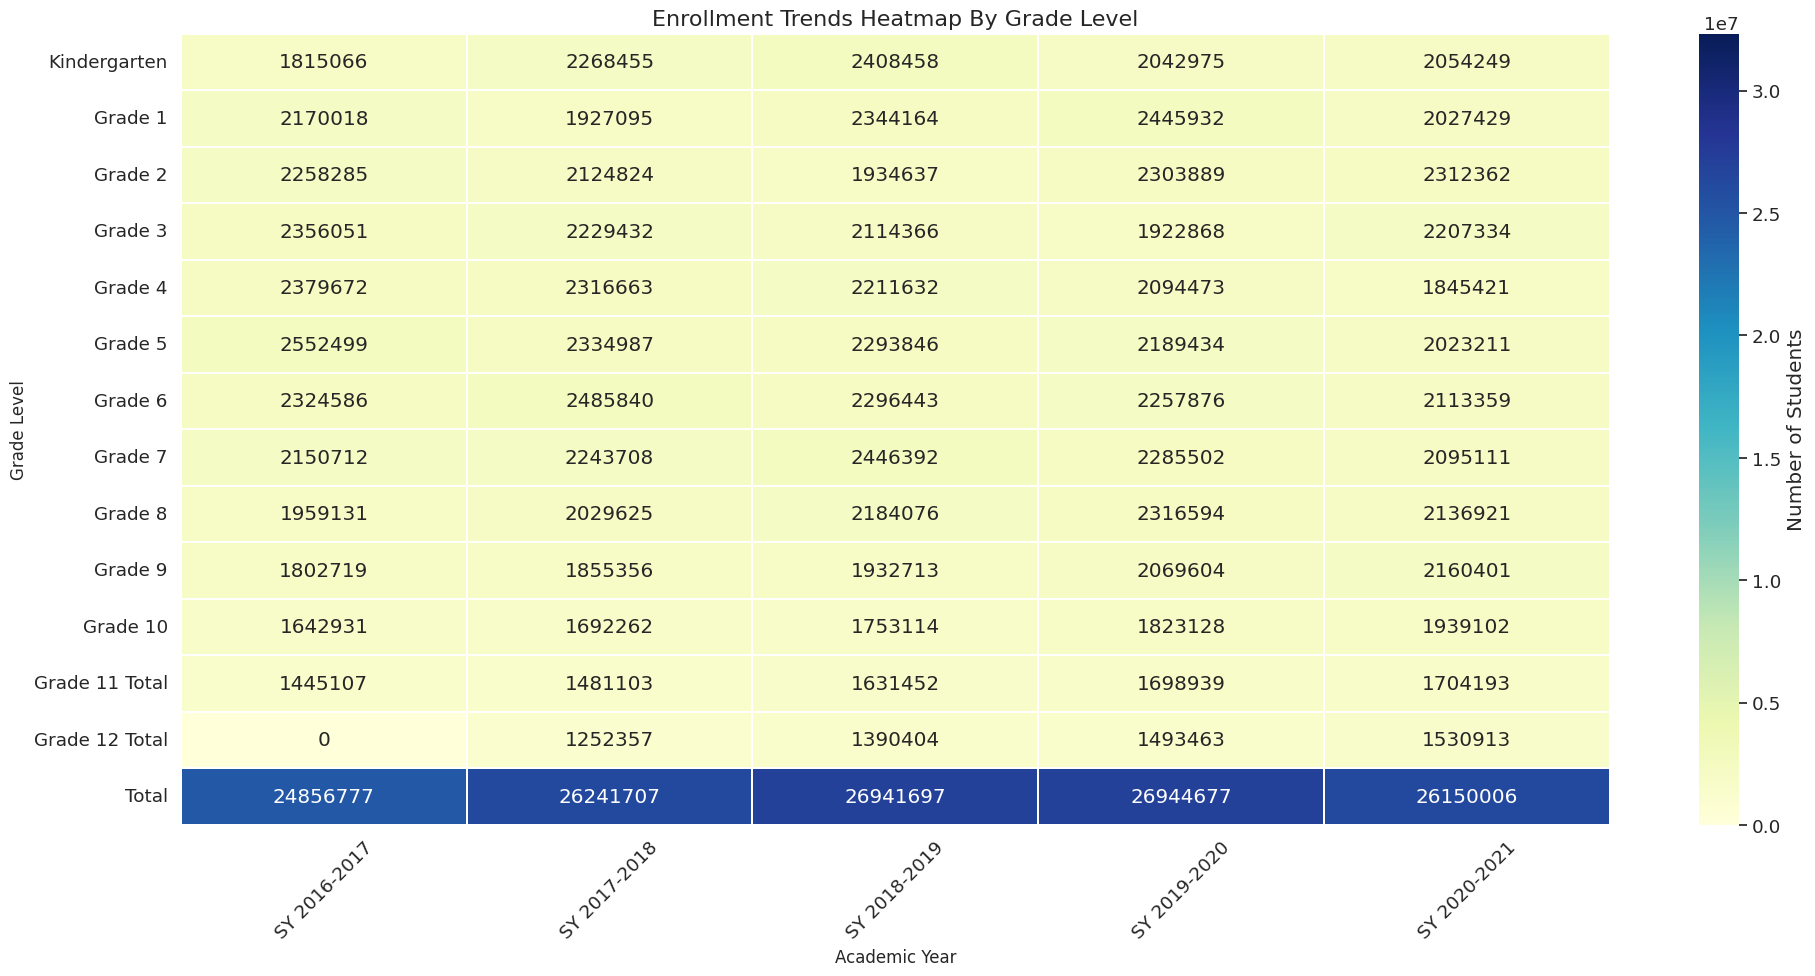

In [10]:
def plot_enrollment_trends_heatmap(data, grade_columns, grade_labels):
   
    sns.set(style="whitegrid", font_scale=1.2)
    
    
    plt.figure(figsize=(20, 10))
    
    
    heatmap_data = data[grade_columns].set_index(data['Academic_Year']).T
    
    
    vmin = heatmap_data.min().min() * 0.8  
    vmax = heatmap_data.max().max() * 1.2 
    
    
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", 
                cbar_kws={'label': 'Number of Students'}, linewidths=0.2, 
                vmin=vmin, vmax=vmax)
    
    
    plt.title(f'Enrollment Trends Heatmap By Grade Level', fontsize=16)
    plt.xlabel('Academic Year', fontsize=12)
    plt.ylabel('Grade Level', fontsize=12)
    
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_enrollment_trends_heatmap(ph_acyear, grade_columns, grade_labels)

# REGIONAL ENROLLMENT COMPARISON SINCE 2016 - 2021

In [11]:
grade_11_EnrollTotal = ph_ACYear1621[['Grade 11 ABM', 'Grade 11 HUMSS', 'Grade 11 STEM', 'Grade 11 GAS', 'Grade 11 MARITIME',
    'Grade 11 TVL', 'Grade 11 SPORTS', 'Grade 11 A&D']].sum(axis=1).to_frame('Grade 11 Total')


In [12]:
grade_12_EnrollTotal = ph_ACYear1621[['Grade 12 ABM', 'Grade 12 HUMSS', 'Grade 12 STEM', 'Grade 12 GAS', 'Grade 12 MARITIME',
       'Grade 12 TVL', 'Grade 12 SPORTS', 'Grade 12 A&D']].sum(axis=1).to_frame('Grade 12 Total')


In [13]:
ph_en = ph_ACYear1621

In [14]:
ph_en['Grade 11 Total'] = grade_11_EnrollTotal
ph_en['Grade 12 Total'] = grade_12_EnrollTotal

/tmp/ipykernel_18/726881800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_en['Grade 11 Total'] = grade_11_EnrollTotal
/tmp/ipykernel_18/726881800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_en['Grade 12 Total'] = grade_12_EnrollTotal


In [15]:
ph_en_reg = ph_en[['Region','Kindergarten', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
                 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11 Total', 'Grade 12 Total']].groupby('Region').sum()
ph_en_reg['Total'] = ph_en_reg.sum(axis=1)

ph_en_reg.reset_index(inplace=True)

ph_en_reg

,Region,Kindergarten,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11 Total,Grade 12 Total,Total
0,BARMM - Bangsamoro Autonomous Region in Muslim...,478002,510069,476677,443388,413819,387230,358789,288457,258212,227105,199738,141300,95304,4278090
1,CAR - Cordillera Administrative Region,169521,171753,175136,174073,177288,186682,189220,188108,177374,164526,151663,142700,102937,2170981
2,CARAGA - CARAGA,314152,324656,324134,319793,318882,331303,332650,323466,306165,280586,249019,216535,153205,3794546
3,NCR - National Capital Region,1046007,1102770,1118970,1122277,1126313,1162455,1172432,1188507,1138678,1083531,1018719,1035156,725101,14040916
4,Region I - Ilocos Region,480055,487183,500690,501162,508423,538296,550453,549531,532998,505751,470977,427823,313103,6366445
5,Region II - Cagayan Valley,358789,363074,371754,366484,365309,382477,382978,370989,349744,325177,295745,269027,195170,4396717
6,Region III - Central Luzon,1131814,1151815,1163225,1155161,1161386,1214996,1225076,1196569,1145967,1073596,991291,901319,644174,14156389
7,Region IV-A - CALABARZON,1475898,1502299,1519579,1504161,1502244,1575727,1592705,1562817,1494870,1406726,1290937,1133653,817450,18379066
8,Region IV-B - MIMAROPA,358505,375686,370600,365214,362866,380680,382333,368226,349824,323759,291707,248953,175107,4353460
9,Region IX - Zamboanga Peninsula,424107,435237,426754,425567,429298,458489,460399,452358,412968,365582,308301,264151,181289,5044500


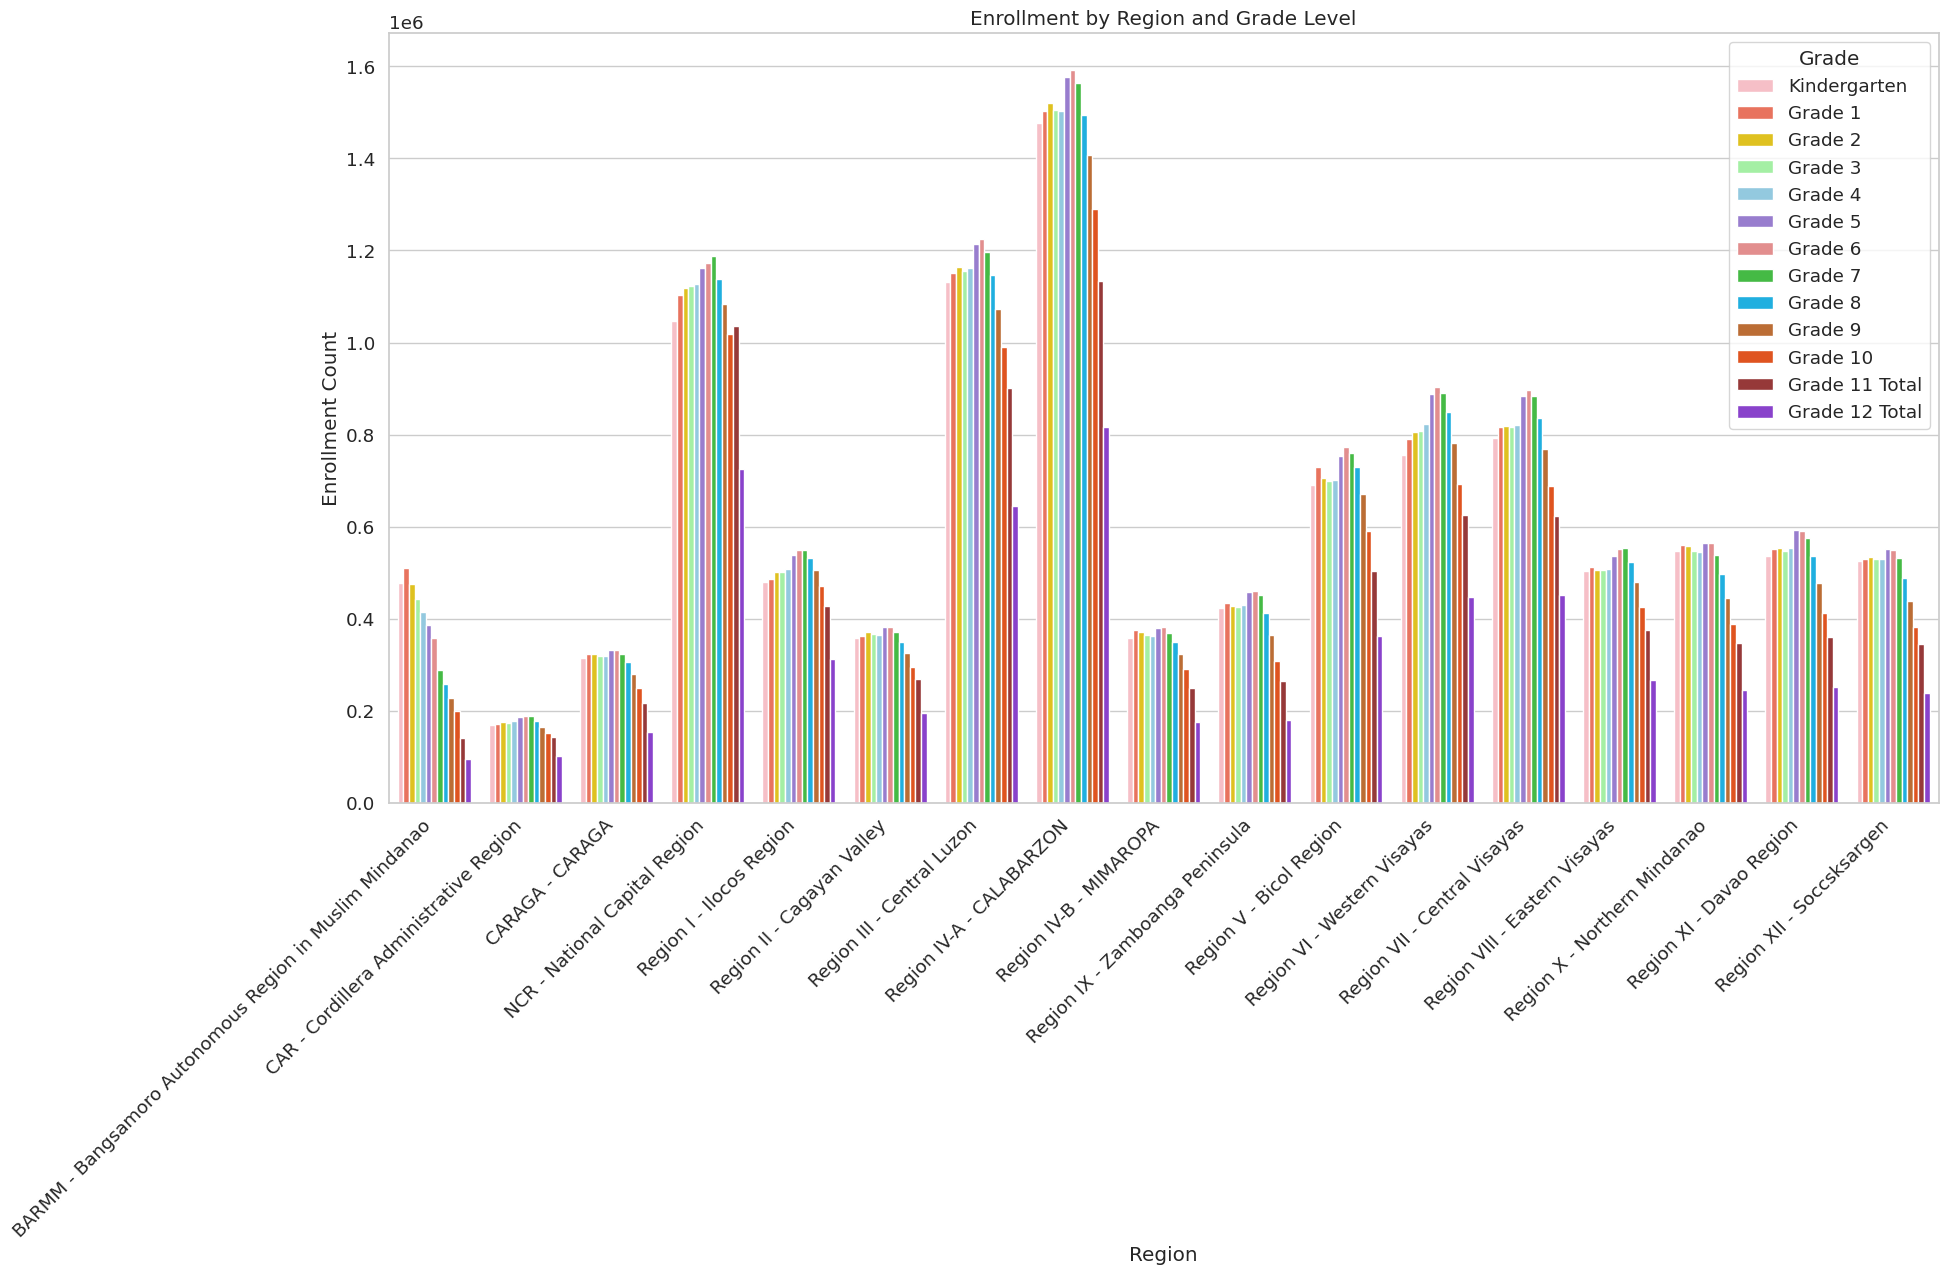

In [16]:
column_grades = ['Kindergarten', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
                 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11 Total', 'Grade 12 Total']

column_labels = ['Kindergarten', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
                'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11 Total', 'Grade 12 Total', 'Total']

grade_colors = {
        'Kindergarten': '#FFB6C1',  # Light Pink
        'Grade 1': '#FF6347',       # Tomato Red
        'Grade 2': '#FFD700',       # Gold
        'Grade 3': '#98FB98',       # Pale Green
        'Grade 4': '#87CEEB',       # Sky Blue
        'Grade 5': '#9370DB',       # Medium Purple
        'Grade 6': '#F08080',       # Light Coral
        'Grade 7': '#32CD32',       # Lime Green
        'Grade 8': '#00BFFF',       # Deep Sky Blue
        'Grade 9': '#D2691E',       # Chocolate
        'Grade 10': '#FF4500',      # Orange Red
        'Grade 11 Total': '#A52A2A', # Brown
        'Grade 12 Total': '#8A2BE2'  # Blue Violet
    }


def plot_enrollment_region_bar(data, column_grades, column_labels):
    sns.set(style="whitegrid", font_scale=1.2)

    
    melted_data = data.melt(id_vars='Region', value_vars=column_grades, 
                            var_name='Grade', value_name='Enrollment')

    plt.figure(figsize=(20, 10))

   
    sns.barplot(x='Region', y='Enrollment', hue='Grade', data=melted_data, palette=grade_colors)

    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Region')
    plt.ylabel('Enrollment Count')
    plt.title('Enrollment by Region and Grade Level')

    plt.show()

plot_enrollment_region_bar(ph_en_reg, column_grades, column_labels)

# Grade-Level Distribution in Specific Programs

In [17]:
ph_enroll_g1112 = ph_ACYear1621[['Academic_Year','Grade 11 ABM', 'Grade 11 HUMSS', 'Grade 11 STEM', 'Grade 11 GAS', 'Grade 11 MARITIME',
    'Grade 11 TVL', 'Grade 11 SPORTS', 'Grade 11 A&D','Grade 12 ABM', 'Grade 12 HUMSS', 'Grade 12 STEM', 'Grade 12 GAS', 'Grade 12 MARITIME',
       'Grade 12 TVL', 'Grade 12 SPORTS', 'Grade 12 A&D']].groupby('Academic_Year').sum()

ph_enroll_g1112.reset_index(inplace=True)

ph_enroll_g1112

,Academic_Year,Grade 11 ABM,Grade 11 HUMSS,Grade 11 STEM,Grade 11 GAS,Grade 11 MARITIME,Grade 11 TVL,Grade 11 SPORTS,Grade 11 A&D,Grade 12 ABM,Grade 12 HUMSS,Grade 12 STEM,Grade 12 GAS,Grade 12 MARITIME,Grade 12 TVL,Grade 12 SPORTS,Grade 12 A&D
0,SY 2016-2017,210195,139593,220590,300399,3036,562572,2853,5869,0,0,0,0,0,0,0,0
1,SY 2017-2018,207779,195982,206736,309765,6742,546041,2242,5816,183657,124595,192624,261364,3348,479866,2145,4758
2,SY 2018-2019,219221,283162,234262,293311,8042,583139,3004,7311,197124,190753,201449,284455,5776,502787,2156,5904
3,SY 2019-2020,208356,372124,263796,271379,6107,566490,3006,7681,203837,267506,226437,263442,6867,516041,2477,6856
4,SY 2020-2021,194848,425781,277560,296173,2626,499262,2234,5709,190245,343334,244875,243151,5160,494594,2755,6799


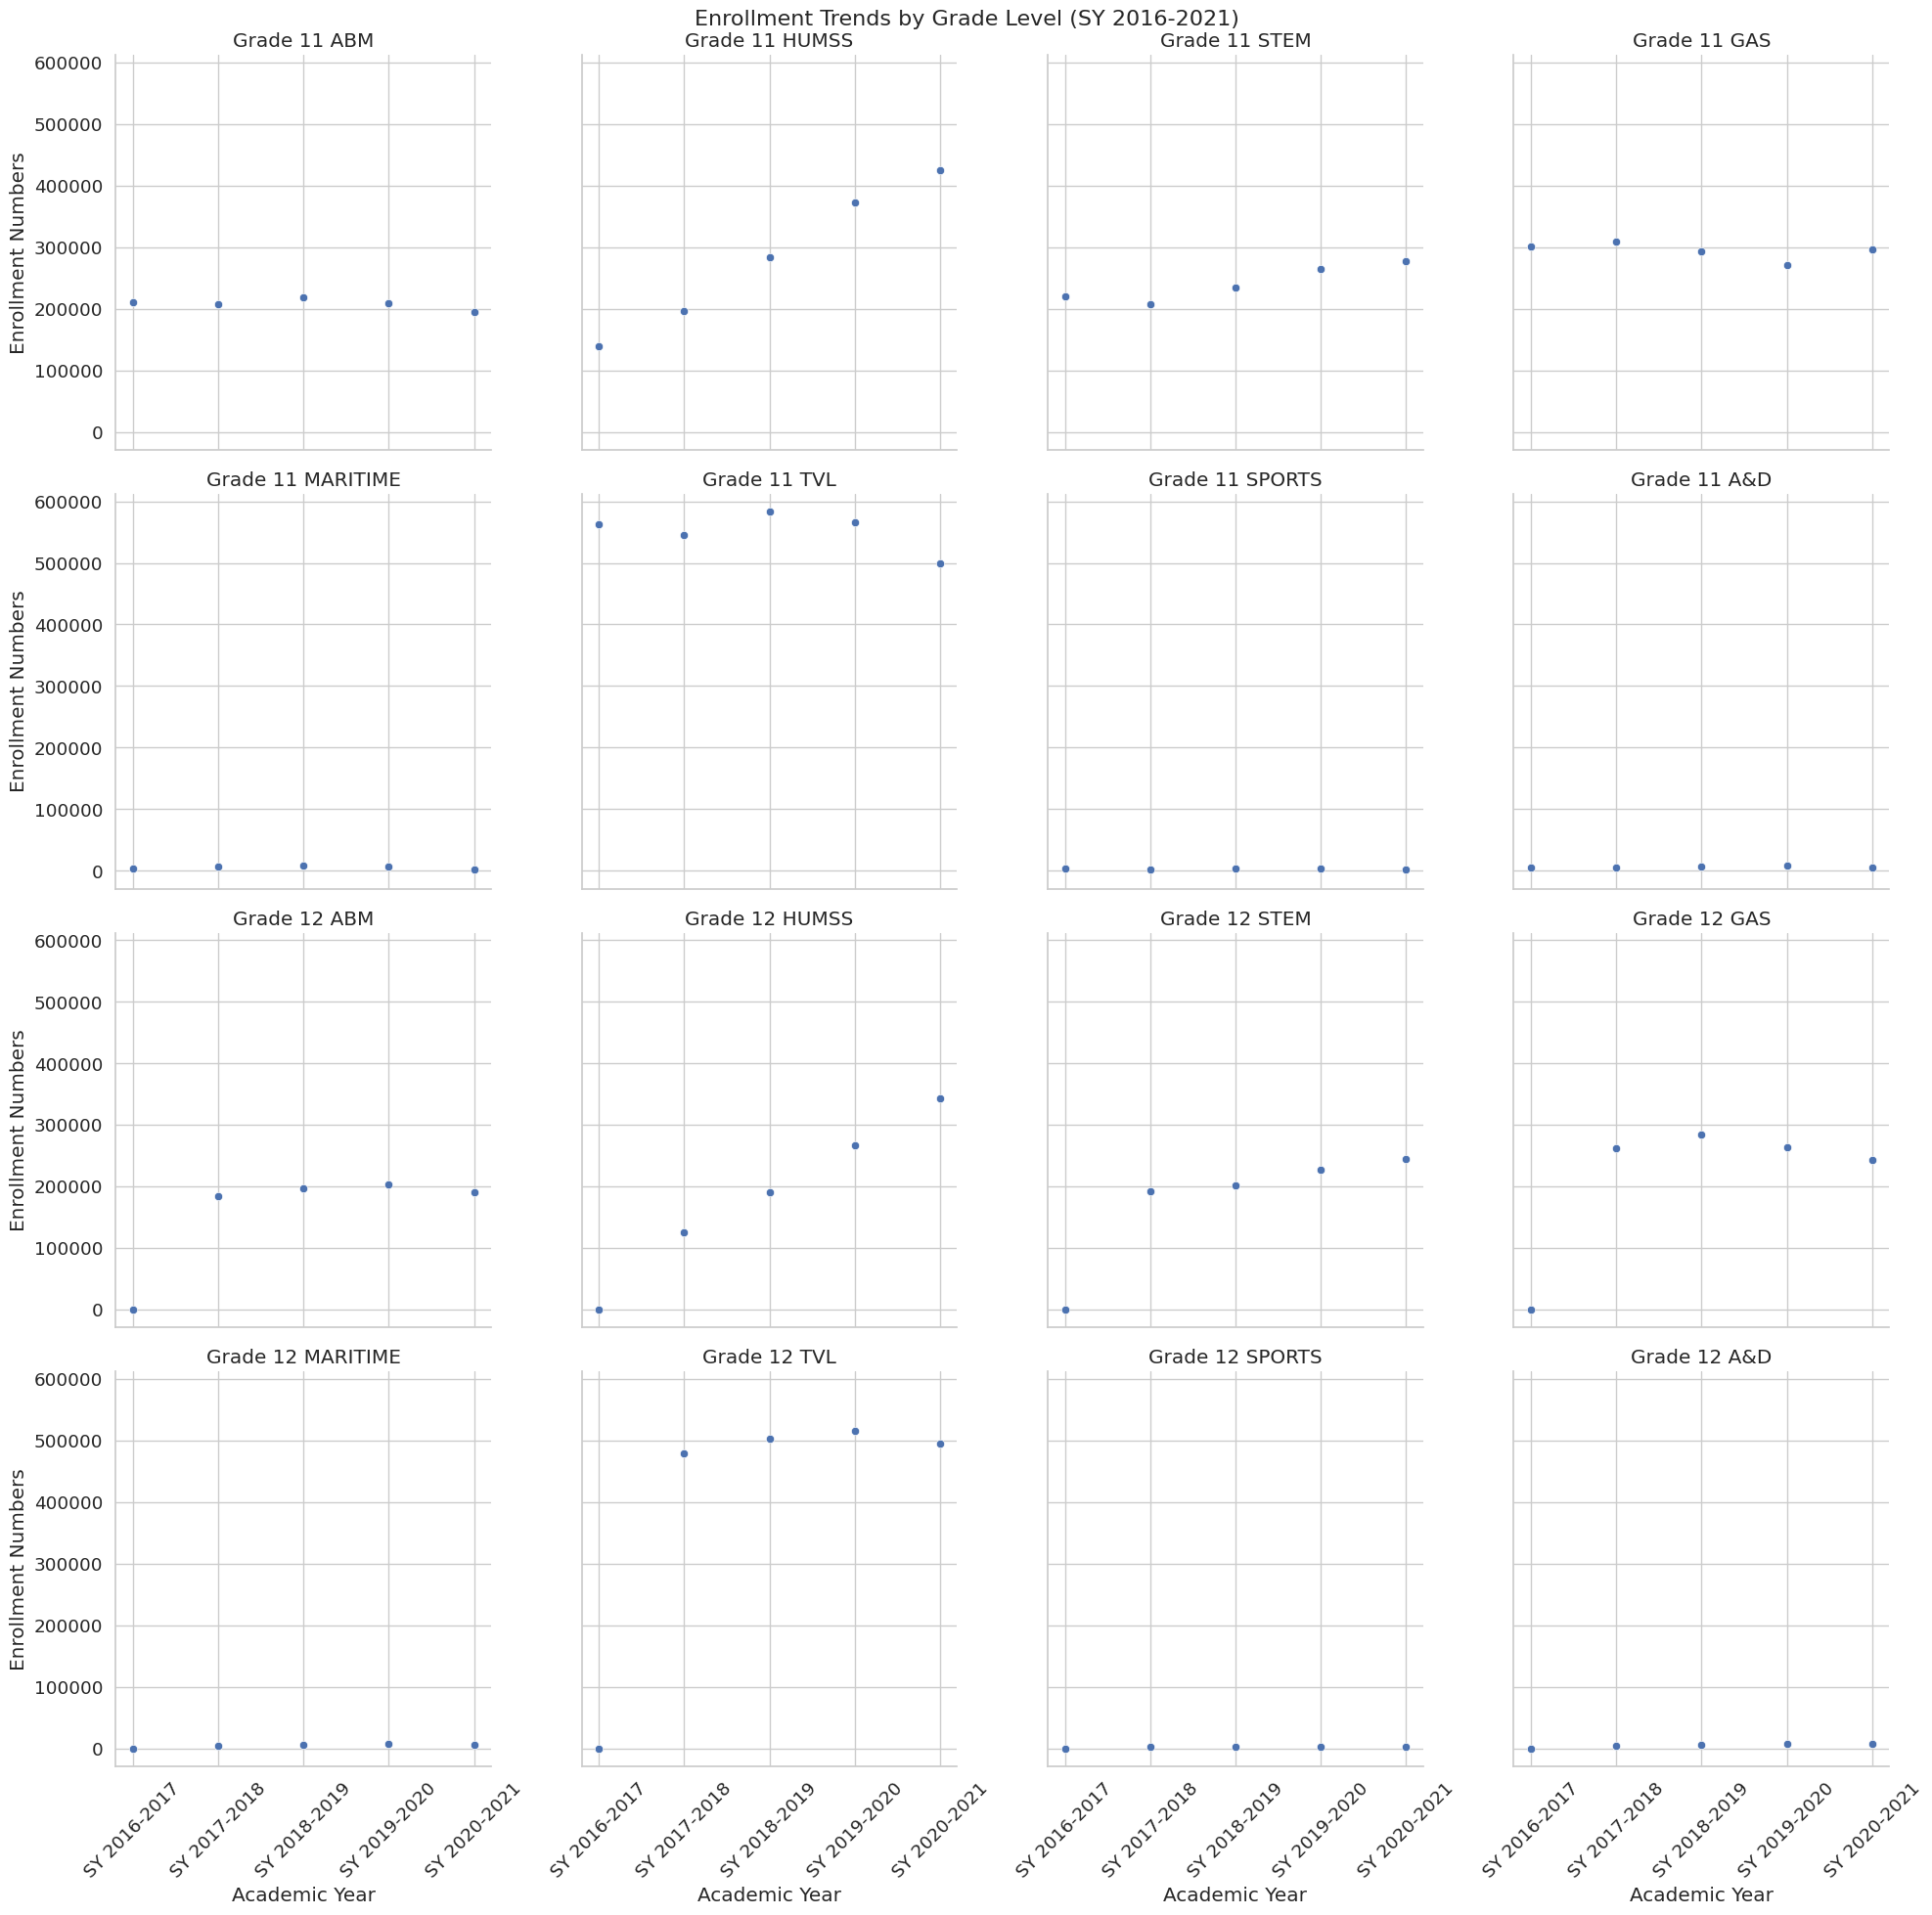

In [18]:
ph_enroll_g1112_melted = ph_enroll_g1112.melt(id_vars='Academic_Year', var_name='Grade', value_name='Enrollment')


g = sns.FacetGrid(ph_enroll_g1112_melted, col='Grade', col_wrap=4, height=5)
g.map(sns.scatterplot, 'Academic_Year', 'Enrollment', color='b')


for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)


g.set_axis_labels("Academic Year", "Enrollment Numbers")
g.set_titles("{col_name}")
g.fig.suptitle('Enrollment Trends by Grade Level (SY 2016-2021)', size=16)


plt.tight_layout()
plt.show()

# Sector-Based Enrollment Analysis

In [19]:
ph_sec = ph_en[['Academic_Year','sector','Kindergarten', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
                 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11 Total', 'Grade 12 Total']].groupby(['Academic_Year','sector']).sum()

ph_sec.reset_index(inplace=True)

ph_sec

,Academic_Year,sector,Kindergarten,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11 Total,Grade 12 Total
0,SY 2016-2017,Private,216997,204264,204859,201444,196937,194786,184648,355166,337722,324058,316895,661655,0
1,SY 2016-2017,Public,1596754,1964338,2051763,2152883,2180849,2355863,2137989,1782780,1609838,1467669,1315661,731981,0
2,SY 2016-2017,SUC-LUC,1315,1416,1663,1724,1886,1850,1949,12766,11571,10992,10375,51471,0
3,SY 2017-2018,Private,243818,192300,204672,205069,200188,195726,196360,368557,346861,330175,317537,684653,564351
4,SY 2017-2018,Public,2023322,1733379,1918489,2022639,2114589,2137411,2287531,1862178,1670380,1513564,1363205,748524,646618
5,SY 2017-2018,SUC-LUC,1315,1416,1663,1724,1886,1850,1949,12973,12384,11617,11520,47926,41388
6,SY 2018-2019,Private,296266,226675,196729,204015,204930,201174,198336,392183,364429,339873,325332,717044,622907
7,SY 2018-2019,Public,2110675,2115902,1736403,1908656,2004883,2090783,2096303,2039781,1805549,1579759,1415160,878850,720787
8,SY 2018-2019,SUC-LUC,1517,1587,1505,1695,1819,1889,1804,14428,14098,13081,12622,35558,46710
9,SY 2019-2020,Private,250811,237809,222244,192372,199371,200800,200175,373740,380858,354187,330503,714023,643859


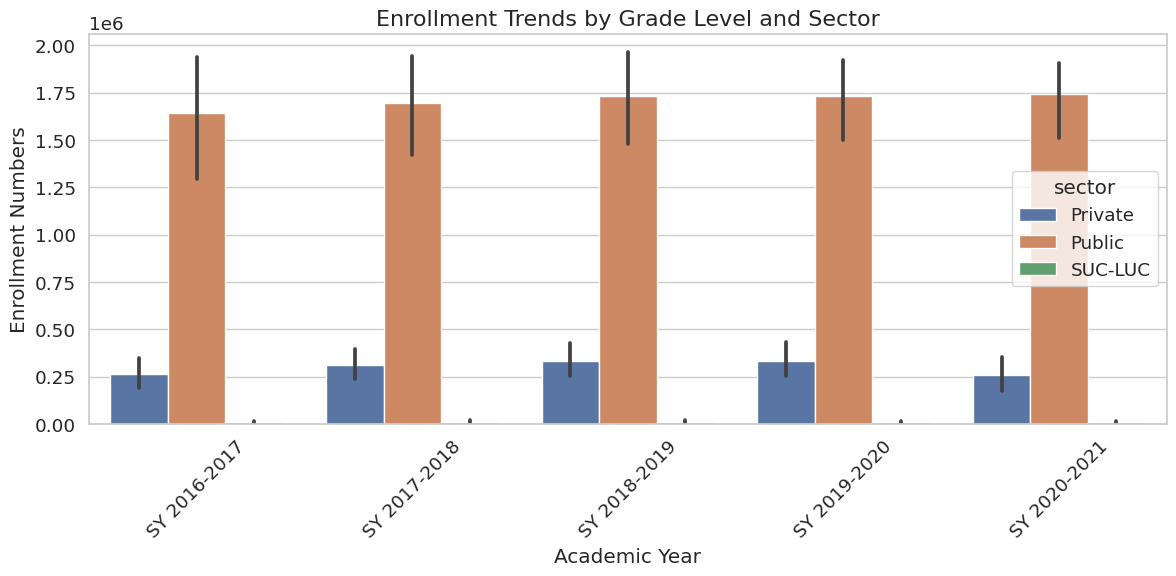

In [20]:
ph_sec_melted = ph_sec.melt(id_vars=['Academic_Year', 'sector'], 
                            var_name='Grade', 
                            value_name='Enrollment')

sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(12, 6))
sns.barplot(data=ph_sec_melted, x="Academic_Year", y="Enrollment", hue="sector")

plt.xticks(rotation=45)

plt.xlabel("Academic Year")
plt.ylabel("Enrollment Numbers")
plt.title("Enrollment Trends by Grade Level and Sector", fontsize=16)

plt.tight_layout()
plt.show()